<a href="https://colab.research.google.com/github/neogeolee/Deeplearning/blob/master/tf06_mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/19
이름 : 이태훈
내용 : 딥러닝 mnist 이미지 분류 실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from PIL import Image # 파이썬 이미지 처리 라이브러리

In [ ]:
# 구글드라이브연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 구글드라이브 이미지 로드하기
img1 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img1.jpg')
img2 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img2.jpg')
img3 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img3.jpg')
img4 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img4.jpg')
img5 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img5.jpg')

# 이미지 파일의 픽셀값 추출
img1_px = np.array(img1)
img2_px = np.array(img2)
img3_px = np.array(img3)
img4_px = np.array(img4)
img5_px = np.array(img5)

img_arr = np.array([img1_px, img2_px, img3_px, img4_px, img5_px])
img_arr = img_arr / 255
img_arr

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [ ]:
# 학습데이터 로드
(mnist_train_data, mnist_train_label), (mnist_test_data, mnist_test_label) = load_data()

# 데이터 형태 확인
print(mnist_train_data.shape, mnist_train_label.shape)
print(mnist_test_data.shape, mnist_test_label.shape)
print(mnist_train_label)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[5 0 4 ... 5 6 8]


[21257 38575  6926 31602 46443]


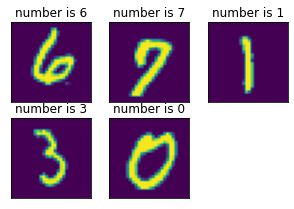

In [ ]:
# 데이터 샘플 이미지 출력
random_idx = np.random.randint(60000, size=5)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx, :])
  plt.title('number is %d' % label)

In [ ]:
# 데이터셋 분할하기
train_data, test_data, train_label, test_label = train_test_split(mnist_train_data, mnist_train_label)
print('훈련데이터 : ', train_data.shape)
print('검증데이터 : ', test_data.shape)

훈련데이터 :  (45000, 28, 28)
검증데이터 :  (15000, 28, 28)


In [ ]:
# 모델학습을 위한 데이터전처리(정규화)
train_data = train_data / 255
test_data = test_data / 255
mnist_test_data = mnist_test_data / 255

# 각 데이터의 레이블을 범주형(one-hot encoding) 형태로 변환
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
mnist_test_label = to_categorical(mnist_test_label)

In [ ]:
# 학습모델 구성하기
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # 입력층
model.add(Dense(64, activation='relu')) # 은닉층
model.add(Dense(32, activation='relu')) # 은닉층
model.add(Dense(10, activation='softmax')) # 출력층

In [ ]:
# 학습모델 설정하기
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# 학습하기
model.fit(train_data,
          train_label,
          epochs=30,
          batch_size=128,
          validation_data=(test_data, test_label))

Epoch 1/30
352/352 [==============================] - 1s 3ms/step - loss: 0.4629 - acc: 0.8712 - val_loss: 0.2610 - val_acc: 0.9269
Epoch 2/30
352/352 [==============================] - 1s 3ms/step - loss: 0.2135 - acc: 0.9380 - val_loss: 0.1993 - val_acc: 0.9433
Epoch 3/30
352/352 [==============================] - 1s 3ms/step - loss: 0.1597 - acc: 0.9527 - val_loss: 0.1656 - val_acc: 0.9527
Epoch 4/30
352/352 [==============================] - 1s 3ms/step - loss: 0.1249 - acc: 0.9633 - val_loss: 0.1406 - val_acc: 0.9600
Epoch 5/30
352/352 [==============================] - 1s 3ms/step - loss: 0.1033 - acc: 0.9694 - val_loss: 0.1234 - val_acc: 0.9650
Epoch 6/30
352/352 [==============================] - 1s 3ms/step - loss: 0.0877 - acc: 0.9739 - val_loss: 0.1237 - val_acc: 0.9633
Epoch 7/30
352/352 [==============================] - 1s 3ms/step - loss: 0.0759 - acc: 0.9771 - val_loss: 0.1170 - val_acc: 0.9647
Epoch 8/30
352/352 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
# 평가하기
model.evaluate(mnist_test_data, mnist_test_label)

313/313 [==============================] - 0s 970us/step - loss: 0.1264 - acc: 0.9743


[0.12644894421100616, 0.9743000268936157]

In [ ]:
# 테스트하기
result = model.predict(mnist_test_data)
result.round()

from sklearn.metrics import accuracy_score
score = accuracy_score(result.round(), mnist_test_label)
print('점수 : ', score)

final_result = model.predict(img_arr)
print('final_result')
print(final_result.round())

점수 :  0.9737
final_result
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
